### clustering all the buurten - still WIP

In [582]:
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [584]:
### INTERMEZZO GET MAP ###
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import numpy as np
from pyogrio import read_dataframe

# first create a map which can be used later in the analysis
file_path = '../data/buurt_2020_v3.shp'
buurten_map = read_dataframe(file_path)
clean_up = True
provincie_utrecht_gemeente =[
    'Amersfoort',
    'Baarn',
    'Bunnik',
    'Bunschoten',
    'De Bilt',
    'De Ronde Venen',
    'Eemnes',
    'Houten',
    'Leusden',
    'Lopik',
    'Montfoort',
    'Nieuwegein',
    'Oudewater',
    'Renswoude',
    'Rhenen',
    'Soest',
    'Stichtse Vecht',
    'Utrecht',
    'Utrechtse Heuvelrug',
    'Veenendaal',
    'Vijfheerenlanden',
    'Wijk bij Duurstede',
    'Woerden',
    'Woudenberg',
    'IJsselstein',
    'Zeist']

deel_provincie_utrecht = ['Utrecht'] # houten

gemeente_selectie = deel_provincie_utrecht
# gemeente_selectie = provincie_utrecht_gemeente
gem_map = buurten_map.loc[buurten_map['GM_NAAM'].isin(gemeente_selectie)]

if clean_up:
    drop_buurten_houten = ['Buitengebied Houten West',
        'Buitengebied Houten Oost', "Dorp 't Goy", "'t Goyse Dorp",
        "Buitengebied 't Goy", "'t Waal", 'Tull',
        "Buitengebied Tull en 't Waal", 'Dorp Schalkwijk West',
        'Dorp Schalkwijk Oost', 'Buitengebied Schalkwijk West',
        'Buitengebied Schalkwijk Oost','Bruggen', 'Bogen', 'De Poel',
        'Schepen', 'Boten', 'Honen', 'Kaden', 'Vesten', 'De Staart',
        'Hof van Wulven', 'Rondweg Noord-Oost', 'Rondweg Noord-West',
        'Rondweg Zuid-Oost', 'Rondweg Zuid-West'] 

    drop_buurten_utrecht = [
        'Bedrijventerrein Lageweide',
        'Haarzuilens en omgeving',
        'Bedrijventerrein en omgeving',
        'Utrecht Science Park',
                'Bedrijvengebied Strijkviertel', 
                'Bedrijvengebied Papendorp',
                'Rijnenburg',
                'Poldergebied Overvecht' ,
                ]

    gem_map = gem_map.loc[~gem_map['BU_NAAM'].isin(drop_buurten_houten)]
    gem_map = gem_map.loc[~gem_map['BU_NAAM'].isin(drop_buurten_utrecht)]

### INTERMEZZO GET MAP ###

In [585]:
# get the dataset to do some clustering
df = pd.read_csv('../data/buurten.csv', index_col=0)

In [586]:
df.head(1)

,buurt_code,gm_naam,regio,aantal_inwoners,aantal_inwoners_tussen_25_44_percentage,aantal_huishoudens_met_kinderen_percentage,gemiddelde_huishoudensgrootte,woningvoorraad,gemiddelde_woningwaarde,meergezinswoning_percentage,...,leefbarometer_score,leefbarometer_fysieke_omgeving,leefbarometer_fysieke_overlast,leefbarometer_sociale_samenhang,leefbarometer_voorzieningen,aardgasverbruik_m3_gemiddeld,elektriciteitsverbruik_kwh_gemiddeld,social_economische_score_gemiddeld,geluid_van_treinverkeer,geluid_van_weg
0,BU03070100,Amersfoort,Hof,710,36.62,5.63,1.4,396,335.0,69.0,...,4.22,0.02,-0.14,-0.04,0.24,1310.0,2430.0,-0.12,20.0,31.65


In [587]:
# create subselection of dataset
clean_buurten = gem_map['BU_CODE']
df = df.loc[df['buurt_code'].isin(clean_buurten)]

In [589]:
# df = df.drop(columns=['gm_naam', 'regio'])
df = df.dropna()

In [590]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 394 to 503
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   buurt_code                                  97 non-null     object 
 1   gm_naam                                     97 non-null     object 
 2   regio                                       97 non-null     object 
 3   aantal_inwoners                             97 non-null     int64  
 4   aantal_inwoners_tussen_25_44_percentage     97 non-null     float64
 5   aantal_huishoudens_met_kinderen_percentage  97 non-null     float64
 6   gemiddelde_huishoudensgrootte               97 non-null     float64
 7   woningvoorraad                              97 non-null     int64  
 8   gemiddelde_woningwaarde                     97 non-null     float64
 9   meergezinswoning_percentage                 97 non-null     float64
 10  bewoond_perce

In [591]:
df = df.set_index(['buurt_code','gm_naam', 'regio'])
df.head(1)

,,,aantal_inwoners,aantal_inwoners_tussen_25_44_percentage,aantal_huishoudens_met_kinderen_percentage,gemiddelde_huishoudensgrootte,woningvoorraad,gemiddelde_woningwaarde,meergezinswoning_percentage,bewoond_percentage,koopwoning_percentage,bouwjaar_vanaf_2000_percentage,...,leefbarometer_score,leefbarometer_fysieke_omgeving,leefbarometer_fysieke_overlast,leefbarometer_sociale_samenhang,leefbarometer_voorzieningen,aardgasverbruik_m3_gemiddeld,elektriciteitsverbruik_kwh_gemiddeld,social_economische_score_gemiddeld,geluid_van_treinverkeer,geluid_van_weg
buurt_code,gm_naam,regio,,,,,,,,,,,,,,,,,,,,,
BU03440111,Utrecht,"Welgelegen, Den Hommel",1855,42.32,7.01,1.6,910,370.0,79.0,92.0,44.0,30.0,...,4.15,-0.03,-0.1,0.0,0.19,380.0,2150.0,-0.07,20.0,37.48


In [592]:
X = df.reset_index(drop=True)

In [593]:
X.head(1)

,aantal_inwoners,aantal_inwoners_tussen_25_44_percentage,aantal_huishoudens_met_kinderen_percentage,gemiddelde_huishoudensgrootte,woningvoorraad,gemiddelde_woningwaarde,meergezinswoning_percentage,bewoond_percentage,koopwoning_percentage,bouwjaar_vanaf_2000_percentage,...,leefbarometer_score,leefbarometer_fysieke_omgeving,leefbarometer_fysieke_overlast,leefbarometer_sociale_samenhang,leefbarometer_voorzieningen,aardgasverbruik_m3_gemiddeld,elektriciteitsverbruik_kwh_gemiddeld,social_economische_score_gemiddeld,geluid_van_treinverkeer,geluid_van_weg
0,1855,42.32,7.01,1.6,910,370.0,79.0,92.0,44.0,30.0,...,4.15,-0.03,-0.1,0.0,0.19,380.0,2150.0,-0.07,20.0,37.48


In [594]:
print(len(X.columns))

31


In [595]:
#scale data
ss = StandardScaler()
X = ss.fit_transform(X)

In [596]:
# # # reduce pca to visualize results
pca = PCA(n_components=10)
X = pca.fit_transform(X)

# reduce technqiue with tsne
# tsne = TSNE(n_components=10, perplexity=15,method='exact',random_state=42, init='random', learning_rate=200)
# X = tsne.fit_transform(X)

In [597]:
## edit:
## determine best centriods:
## mean of cluster is determined = centroid
## each point is put in cluster > then  mean is calculated > variance within cluster is calculated 
## lowest variance within cluster is best mean cluster score so therefore new centroids are created in new iterations to deterime lowest overall variance

## then to determine optimal clusters:
## with more clusters we will always get more points that we catch with the lowest variance;but the point is that we have lowers variance with miniaml clusters (thats really winning).
# inertia per cluster measures how well the clusters represent the datapoints (distance from points to center as measurement)

In [598]:
from sklearn.cluster import KMeans
all = []
number_clusters = range(1,10)

# lets try different clustering and de elbow method to see what is optimal
for i in number_clusters:
    kmeans = KMeans(i, n_init=10)
    kmeans.fit(X)

    cluster_inertia = kmeans.inertia_   
    all.append(cluster_inertia)

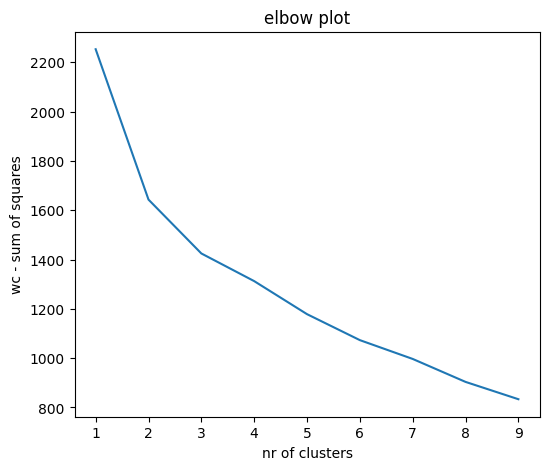

In [599]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5))
plt.plot(number_clusters, all)
plt.title('elbow plot')
plt.xlabel('nr of clusters')
plt.ylabel('wc - sum of squares') #within cluster
plt.show()

In [600]:
## cut-off seems to be at 3
kmeans = KMeans(n_clusters=3)
output = kmeans.fit_transform(X)

/Users/nellekesmits/Documents/projects/notebook.buurtenrecommender/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [601]:
df.head()

,,,aantal_inwoners,aantal_inwoners_tussen_25_44_percentage,aantal_huishoudens_met_kinderen_percentage,gemiddelde_huishoudensgrootte,woningvoorraad,gemiddelde_woningwaarde,meergezinswoning_percentage,bewoond_percentage,koopwoning_percentage,bouwjaar_vanaf_2000_percentage,...,leefbarometer_score,leefbarometer_fysieke_omgeving,leefbarometer_fysieke_overlast,leefbarometer_sociale_samenhang,leefbarometer_voorzieningen,aardgasverbruik_m3_gemiddeld,elektriciteitsverbruik_kwh_gemiddeld,social_economische_score_gemiddeld,geluid_van_treinverkeer,geluid_van_weg
buurt_code,gm_naam,regio,,,,,,,,,,,,,,,,,,,,,
BU03440111,Utrecht,"Welgelegen, Den Hommel",1855,42.32,7.01,1.6,910,370.0,79.0,92.0,44.0,30.0,...,4.15,-0.03,-0.10,0.00,0.19,380.0,2150.0,-0.07,20.00,37.48
BU03440112,Utrecht,Oog in Al,4220,23.46,19.43,2.8,1428,615.0,13.0,98.0,89.0,11.0,...,4.24,-0.02,-0.04,0.01,0.17,1610.0,3000.0,0.67,20.54,27.25
BU03440113,Utrecht,Halve Maan-Zuid,1430,33.92,11.19,2.0,561,390.0,61.0,93.0,77.0,22.0,...,4.16,-0.03,-0.07,0.01,0.15,990.0,2170.0,0.36,20.00,36.44
BU03440114,Utrecht,Halve Maan-Noord,1740,34.77,14.37,2.0,882,321.0,89.0,93.0,31.0,12.0,...,3.89,-0.04,-0.21,-0.07,0.15,1030.0,1850.0,-0.18,29.29,30.58
BU03440121,Utrecht,Lombok-Oost,2190,52.05,7.31,1.5,1094,326.0,67.0,94.0,29.0,18.0,...,4.03,-0.07,-0.20,-0.08,0.29,1040.0,2100.0,-0.10,21.14,36.33


In [602]:
df['labels'] = kmeans.labels_ + 1

In [603]:
df['labels'].value_counts()

2    39
3    29
1    29
Name: labels, dtype: int64

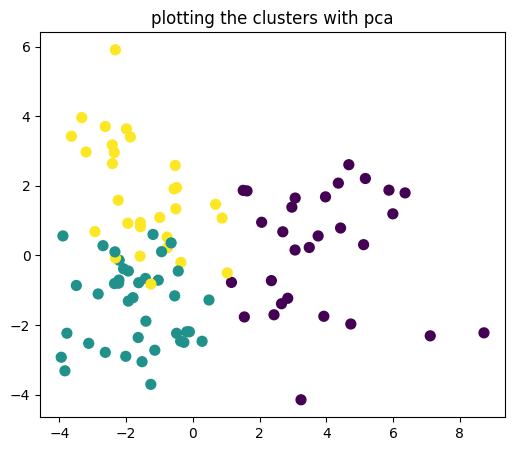

In [604]:
## Visualize with PCA

# reduce pca to visualize results
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)

# Plot the clustered data
plt.figure(figsize=(6, 5))
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.title('plotting the clusters with pca')
# plt.savefig('scaling_pca_scatter_pca.png')
plt.show()


/var/folders/1r/tdmn3kx53dxffhrmfbsld_4w0000gn/T/ipykernel_23404/2023328205.py:18: RuntimeWarning: Mean of empty slice.
  avg_x = xs.mean()
/Users/nellekesmits/Documents/projects/notebook.buurtenrecommender/venv/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/1r/tdmn3kx53dxffhrmfbsld_4w0000gn/T/ipykernel_23404/2023328205.py:19: RuntimeWarning: Mean of empty slice.
  avg_y = ys.mean()


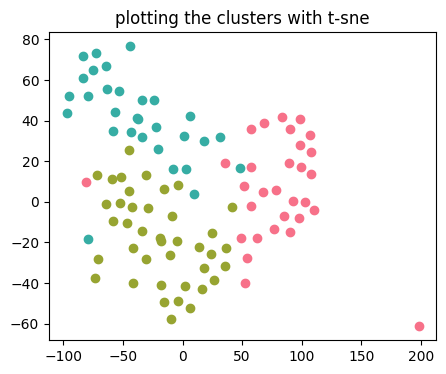

In [606]:
## Visualize with TSNE

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
x_tsne = tsne.fit_transform(X)

x = [x for x,y in x_tsne]
y = [y for x,y in x_tsne]

palette = sns.color_palette("husl", 4).as_hex() 

plt.figure(figsize=(5, 4))

for category, color in enumerate(palette):
    xs = np.array(x)[df.labels==category+1]
    ys = np.array(y)[df.labels==category+1]
    plt.scatter(xs, ys, color=color)

    avg_x = xs.mean()
    avg_y = ys.mean()
    
    plt.scatter(avg_x, avg_y, color=color)
plt.title("plotting the clusters with t-sne")
# plt.savefig('scaling_pca_scatter_tsne.png')
plt.show()


In [607]:
output = df.reset_index()
output.head(1)

,buurt_code,gm_naam,regio,aantal_inwoners,aantal_inwoners_tussen_25_44_percentage,aantal_huishoudens_met_kinderen_percentage,gemiddelde_huishoudensgrootte,woningvoorraad,gemiddelde_woningwaarde,meergezinswoning_percentage,...,leefbarometer_fysieke_omgeving,leefbarometer_fysieke_overlast,leefbarometer_sociale_samenhang,leefbarometer_voorzieningen,aardgasverbruik_m3_gemiddeld,elektriciteitsverbruik_kwh_gemiddeld,social_economische_score_gemiddeld,geluid_van_treinverkeer,geluid_van_weg,labels
0,BU03440111,Utrecht,"Welgelegen, Den Hommel",1855,42.32,7.01,1.6,910,370.0,79.0,...,-0.03,-0.1,0.0,0.19,380.0,2150.0,-0.07,20.0,37.48,3


In [608]:
merged_df = gem_map.merge(output, left_on='BU_CODE', right_on='buurt_code', how='left')
merged_df.loc[merged_df['labels'].isna(), 'labels'] = 0
merged_df = merged_df.dropna(subset='labels')
merged_df['labels'].value_counts()

2.0    39
3.0    29
1.0    29
0.0     6
Name: labels, dtype: int64

In [609]:
import matplotlib as mpl
vmin, vmax = 0, 5

cmap = mpl.colors.ListedColormap(["white", "red", "navy", "yellow"])
# cmap = mpl.colors.ListedColormap(["red", "navy"])
# cmap = mpl.colors.ListedColormap(["white", "yellow", "red", "navy"])
# cmap = mpl.colors.ListedColormap(["white", "yellow", "red", "navy", "pink", "gold", "grey", "black", "green"])
norm = mpl.colors.BoundaryNorm(np.arange(vmin,vmax), cmap.N) 

/var/folders/1r/tdmn3kx53dxffhrmfbsld_4w0000gn/T/ipykernel_23404/1092463137.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


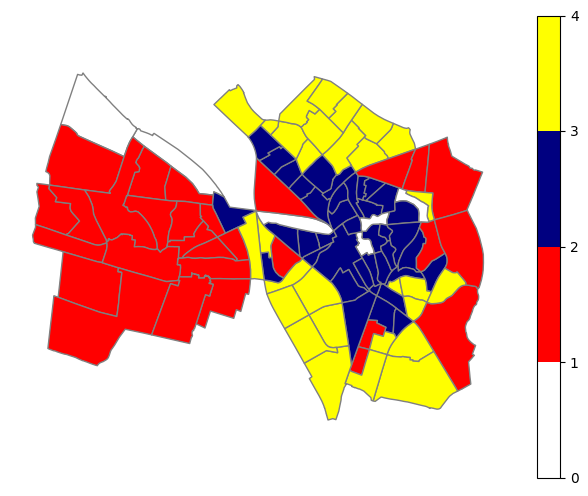

In [610]:
fig, ax = plt.subplots(1, figsize=(8, 6))

merged_df.plot(column="labels",
                    figsize = (6,4),
                    norm = norm,
                    cmap=cmap,
                    edgecolor='grey',
                    ax=ax)

# settings
ax.set_axis_off()
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm)
# plt.savefig('scaling_pca_map.png')
plt.show()

In [614]:
## see which gemeentes are in each cluster
for c_nr in output['labels'].unique():
    cluster = output.loc[output['labels'] == c_nr]
    print('de volgende gemeente worden gevonden voor cluster: ', c_nr)
    print(cluster['regio'].unique()) #gm_naam
    print('\n')

de volgende gemeente worden gevonden voor cluster:  3
['Welgelegen, Den Hommel' 'Halve Maan-Noord' 'Geuzenwijk'
 'Schaakbuurt en omgeving' 'Queeckhovenplein en omgeving' 'Zuilen-Noord'
 'Taag- en Rubicondreef en omgeving' 'Wolga- en Donaudreef en omgeving'
 'Zamenhofdreef en omgeving' 'Neckardreef en omgeving' 'Vechtzoom-zuid'
 'Vechtzoom-noord, Klopvaart' 'Zambesidreef en omgeving'
 'Tigrisdreef en omgeving' 'Huizingalaan, K. Doormanlaan en omgeving'
 'Sterrenwijk' 'Rubenslaan en omgeving' 'L. Napoleonplantsoen en omgeving'
 'Galgenwaard en omgeving' 'Lunetten-Noord' 'Lunetten-Zuid'
 'Nieuw Hoograven-Noord' 'Nieuw Hoograven-Zuid'
 'Bedrijvengebied Kanaleneiland' 'Transwijk-Zuid' 'Transwijk-Noord'
 'Kanaleneiland-Zuid' 'Kanaleneiland-Noord' 'Leeuwesteyn']


de volgende gemeente worden gevonden voor cluster:  1
['Oog in Al' 'Schepenbuurt, Cartesiusweg e.o.'
 'Tuindorp en Van Lieflandlaan-West' 'Tuindorp-Oost'
 'Voordorp en Voorveldsepolder' 'Maarschalkerweerd en Mereveld'
 'Wilhelminapa

In [80]:
# to do: check dbscan and hierarchical clustering